In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [473]:
from sklearn import metrics

### User Defined functions

In [474]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                         x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [475]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [476]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

In [477]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

In [478]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)


### Data Import and Data Inspection

In [479]:
credit_consump=pd.read_csv('/Users/arunbiretheesh/Desktop/MACHINE LEARNING/CASE STUDIES/ Case Study  1- Predict Cred Card Consumption/CreditConsumptionData.csv')
cust_behav=pd.read_csv('/Users/arunbiretheesh/Desktop/MACHINE LEARNING/CASE STUDIES/ Case Study  1- Predict Cred Card Consumption/CustomerBehaviorData.csv')
cust_demo=pd.read_csv('/Users/arunbiretheesh/Desktop/MACHINE LEARNING/CASE STUDIES/ Case Study  1- Predict Cred Card Consumption/CustomerDemographics.csv')

In [480]:
a=pd.merge(left=credit_consump,right=cust_behav,on='ID')
cust_credit_data=pd.merge(left=a,right=cust_demo,on='ID')

In [481]:
cust_credit_data.columns

Index(['ID', 'cc_cons', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'account_type', 'gender', 'age', 'Income',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')

In [482]:
# dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
 #       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
 #       'dc_count_jun','debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
 #       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
 #       'credit_amount_may', 'credit_count_may', 'debit_count_may',
 #       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
 #       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun']
#for i in cust_credit_data[cc]:
   # cust_credit_data[i]=cust_credit_data[i].mean()

In [483]:
cust_credit_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [484]:
cust_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [485]:
y=cust_credit_data['cc_cons']

In [486]:
cust_credit_data.Income=cust_credit_data.Income.map({'LOW':1,'MEDIUM':2,'HIGH':3})

In [487]:
cust_credit_data.nunique()

ID                              20000
cc_cons                         12260
cc_cons_apr                      8459
dc_cons_apr                      3861
cc_cons_may                      8504
dc_cons_may                      4053
cc_cons_jun                      7347
dc_cons_jun                      3019
cc_count_apr                       50
cc_count_may                       58
cc_count_jun                       67
dc_count_apr                       41
dc_count_may                       39
dc_count_jun                       54
card_lim                          308
personal_loan_active                1
vehicle_loan_active                 1
personal_loan_closed                1
vehicle_loan_closed                 1
investment_1                      691
investment_2                      532
investment_3                      246
investment_4                      115
debit_amount_apr                 8724
credit_amount_apr                8153
debit_count_apr                    63
credit_count

In [488]:
conti_vars = cust_credit_data.loc[:, (cust_credit_data.dtypes == 'float64') | (cust_credit_data.dtypes == 'int64')]
cat_vars = cust_credit_data.loc[:, (cust_credit_data.dtypes == 'object')]


In [489]:
cat_vars

,loan_enq,account_type,gender
0,Y,current,M
1,Y,current,M
2,Y,current,M
3,Y,current,F
4,NaN,current,M
...,...,...,...
19995,Y,current,M
19996,Y,current,M
19997,Y,current,M
19998,Y,current,M


In [490]:
conti_vars.apply(lambda x:continuous_var_summary(x).round(2))

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
N,2.000000e+04,1.500000e+04,2.000000e+04,2.000000e+04,1.999900e+04,2.000000e+04,2.000000e+04,1.999900e+04,19999.00,20000.00,...,20000.00,2.000000e+04,1.999900e+04,20000.00,19999.00,20000.00,20000.00,19999.00,20000.00,19997.00
NMISS,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.00,0.00,...,0.00,0.000000e+00,1.000000e+00,0.00,1.00,0.00,0.00,1.00,0.00,3.00
SUM,1.999900e+08,8.273659e+08,3.571398e+08,1.626091e+08,3.237511e+08,1.540485e+08,2.427161e+08,1.421871e+08,832191.00,671382.00,...,890582.00,1.056997e+09,3.079620e+08,953446.00,35999.00,304345.00,109921.00,11978588.00,14360.00,220862.00
MEAN,9.999500e+03,5.515773e+04,1.785699e+04,8.130450e+03,1.618836e+04,7.702430e+03,1.213581e+04,7.109710e+03,41.61,33.57,...,44.53,5.284985e+04,1.539887e+04,47.67,1.80,15.22,5.50,598.96,0.72,11.04
MEDIAN,9.999500e+03,1.336400e+04,1.021464e+04,3.964750e+03,8.635230e+03,3.791720e+03,6.656800e+03,3.326000e+03,10.00,23.00,...,37.00,3.025000e+04,3.934660e+03,40.00,2.00,9.90,6.00,623.00,1.00,11.00
STD,5.773650e+03,9.767097e+04,2.515888e+04,1.457219e+04,2.651068e+04,1.789273e+04,1.879098e+04,1.331394e+04,97.84,50.32,...,35.08,1.343175e+05,1.202541e+05,30.36,0.57,20.48,2.87,220.11,0.45,5.48
VAR,3.333500e+07,9.539619e+09,6.329692e+08,2.123487e+08,7.028162e+08,3.201499e+08,3.531011e+08,1.772609e+08,9571.78,2531.79,...,1230.64,1.804120e+10,1.446104e+10,921.72,0.32,419.49,8.24,48446.31,0.20,30.04
MIN,0.000000e+00,0.000000e+00,2.530000e+02,1.935000e+01,1.570000e+02,2.200000e+01,6.500000e+01,6.200000e+01,1.00,1.00,...,0.00,6.000000e-02,0.000000e+00,25.00,1.00,0.50,1.00,123.00,0.00,2.00
P1,1.999900e+02,2.719900e+02,6.419900e+02,1.531300e+02,5.094900e+02,1.521000e+02,3.340000e+02,1.909500e+02,1.00,1.00,...,0.00,1.600000e+02,2.674000e+01,27.00,1.00,0.90,1.00,233.00,0.00,2.00
P5,9.999500e+02,1.290850e+03,1.219000e+03,3.780000e+02,1.035770e+03,4.109700e+02,8.251000e+02,3.900000e+02,1.00,2.00,...,2.00,1.679500e+03,1.979500e+02,28.00,1.00,1.70,1.00,249.00,0.00,2.00


In [491]:
contin_var=conti_vars.apply(lambda x:x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [492]:
contin_var.apply(continuous_var_summary)

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
N,2.000000e+04,1.500000e+04,2.000000e+04,2.000000e+04,1.999900e+04,2.000000e+04,2.000000e+04,1.999900e+04,19999.000000,20000.000000,...,20000.000000,2.000000e+04,1.999900e+04,20000.000000,19999.000000,20000.000000,20000.000000,1.999900e+04,20000.000000,19997.000000
NMISS,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000,...,0.000000,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000e+00,0.000000,3.000000
SUM,1.999900e+08,8.263654e+08,3.461465e+08,1.528556e+08,3.114854e+08,1.438310e+08,2.326195e+08,1.356907e+08,832191.000000,623136.000000,...,889961.000000,9.563165e+08,2.017207e+08,953579.000000,35999.000000,294931.200000,109921.000000,1.199150e+07,14360.000000,220862.000000
MEAN,9.999500e+03,5.509103e+04,1.730733e+04,7.642779e+03,1.557505e+04,7.191552e+03,1.163097e+04,6.784874e+03,41.611631,31.156800,...,44.498050,4.781583e+04,1.008654e+04,47.678950,1.800040,14.746560,5.496050,5.996052e+02,0.718000,11.044757
MEDIAN,9.999500e+03,1.336400e+04,1.021464e+04,3.964750e+03,8.635230e+03,3.791720e+03,6.656800e+03,3.326000e+03,10.000000,23.000000,...,37.000000,3.025000e+04,3.934660e+03,40.000000,2.000000,9.900000,6.000000,6.230000e+02,1.000000,11.000000
STD,5.770211e+03,9.742949e+04,2.118069e+04,1.045611e+04,2.040082e+04,1.032849e+04,1.468908e+04,1.060956e+04,97.835475,30.484166,...,35.006033,5.733928e+04,2.130330e+04,30.311294,0.566833,17.040411,2.870452,2.187543e+02,0.449985,5.480552
VAR,3.329534e+07,9.492505e+09,4.486215e+08,1.093302e+08,4.161933e+08,1.066777e+08,2.157691e+08,1.125628e+08,9571.780105,929.284378,...,1225.422367,3.287793e+09,4.538307e+08,918.774516,0.321300,290.375592,8.239496,4.785346e+04,0.202486,30.036454
MIN,1.999900e+02,2.719900e+02,6.419886e+02,1.531286e+02,5.094900e+02,1.521000e+02,3.340000e+02,1.909500e+02,1.000000,1.000000,...,0.000000,1.600000e+02,2.673900e+01,27.000000,1.000000,0.900000,1.000000,2.330000e+02,0.000000,2.000000
P1,1.999999e+02,2.719999e+02,6.419999e+02,1.531399e+02,5.094998e+02,1.521000e+02,3.340000e+02,1.909990e+02,1.000000,1.000000,...,0.000000,1.600000e+02,2.673998e+01,27.000000,1.000000,0.900000,1.000000,2.330000e+02,0.000000,2.000000
P5,9.999500e+02,1.290850e+03,1.219000e+03,3.780000e+02,1.035774e+03,4.109700e+02,8.251010e+02,3.900000e+02,1.000000,2.000000,...,2.000000,1.679500e+03,1.979500e+02,28.000000,1.000000,1.700000,1.000000,2.490000e+02,0.000000,2.000000


In [493]:
cat=cust_credit_data.select_dtypes(['object']).apply(categorical_var_summary)

In [494]:
cat

,loan_enq,account_type,gender
N,19998,19999,19999
NMISS,2,1,1
MODE,Y,current,M
FREQ,19998,16925,17287
PERCENT,100.0,84.63,86.44


### Missing values treatment

In [495]:
cust_credit_data.isnull().sum()

ID                                 0
cc_cons                         5000
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
m

In [496]:
conti_vars.drop(columns=['cc_cons'],inplace=True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [497]:
conti_vars=conti_vars.apply(missing_imputation)


In [498]:
conti_vars.apply(continuous_var_summary)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
N,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,...,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
NMISS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
SUM,1.999900e+08,3.571398e+08,1.626091e+08,3.237673e+08,1.540485e+08,2.427161e+08,1.421942e+08,832232.611631,671382.000000,829404.000000,...,890582.000000,1.056997e+09,3.079774e+08,953446.000000,36000.800040,304345.000000,109921.000000,1.197919e+07,14360.000000,220895.134270
MEAN,9.999500e+03,1.785699e+04,8.130453e+03,1.618836e+04,7.702427e+03,1.213581e+04,7.109708e+03,41.611631,33.569100,41.470200,...,44.529100,5.284985e+04,1.539887e+04,47.672300,1.800040,15.217250,5.496050,5.989593e+02,0.718000,11.044757
MEDIAN,9.999500e+03,1.021464e+04,3.964750e+03,8.638870e+03,3.791720e+03,6.656800e+03,3.326000e+03,10.000000,23.000000,35.000000,...,37.000000,3.025000e+04,3.934850e+03,40.000000,2.000000,9.900000,6.000000,6.230000e+02,1.000000,11.000000
STD,5.773647e+03,2.515888e+04,1.457219e+04,2.651002e+04,1.789273e+04,1.879098e+04,1.331360e+04,97.833029,50.316925,46.825658,...,35.080453,1.343175e+05,1.202511e+05,30.359771,0.566819,20.481455,2.870452,2.200997e+02,0.449985,5.480141
VAR,3.333500e+07,6.329692e+08,2.123487e+08,7.027811e+08,3.201499e+08,3.531011e+08,1.772520e+08,9571.301492,2531.792915,2192.642244,...,1230.638185,1.804120e+10,1.446032e+10,921.715698,0.321284,419.489979,8.239496,4.844389e+04,0.202486,30.031949
MIN,0.000000e+00,2.530000e+02,1.935000e+01,1.570000e+02,2.200000e+01,6.500000e+01,6.200000e+01,1.000000,1.000000,1.000000,...,0.000000,6.000000e-02,0.000000e+00,25.000000,1.000000,0.500000,1.000000,1.230000e+02,0.000000,2.000000
P1,1.999900e+02,6.419886e+02,1.531286e+02,5.094950e+02,1.521000e+02,3.340000e+02,1.909750e+02,1.000000,1.000000,1.000000,...,0.000000,1.600000e+02,2.673950e+01,27.000000,1.000000,0.900000,1.000000,2.330000e+02,0.000000,2.000000
P5,9.999500e+02,1.219000e+03,3.780000e+02,1.035817e+03,4.109700e+02,8.251010e+02,3.900000e+02,1.000000,2.000000,3.000000,...,2.000000,1.679500e+03,1.980050e+02,28.000000,1.000000,1.700000,1.000000,2.490000e+02,0.000000,2.000000


In [499]:
conti_vars

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,...,65,50836.0,1674.09,35,2.0,15.0,1,708.0,0,17.000000
1,17645,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,...,63,23226.0,13043.34,35,3.0,15.0,6,123.0,0,14.000000
2,7604,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,...,1,27036.0,25375.27,55,2.0,24.5,1,802.0,1,3.000000
3,1590,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,...,83,43037.0,3544.33,29,2.0,4.5,6,867.0,1,4.000000
4,16556,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,...,32,32044.0,12780.44,34,2.0,12.6,4,802.0,1,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,50,58037.0,7870.88,35,2.0,13.5,1,523.0,0,7.000000
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,38,24110.0,3668.30,53,2.0,9.9,7,723.0,1,2.000000
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,18,1769.0,5450.34,62,3.0,37.8,8,863.0,1,16.000000
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,64,37255.0,59.29,34,2.0,12.6,4,882.0,0,13.000000


### Handling Categorical data

In [500]:
for feature in cat_vars.columns:
    cat_vars=create_dummies(cat_vars,feature)
   
    

In [501]:
for Columns in cat_vars.columns:
    impute_nan_most_frequent_category(cat_vars,Columns)

In [502]:
cat_vars = cat_vars.drop(['account_type_saving','gender_M'], axis = 1)

In [503]:
cust_credit_data_new=pd.concat([y,conti_vars,cat_vars],axis=1)

In [504]:
cust_credit_data_new.drop(columns=['Emp_Tenure_Years','region_code'],inplace=True)

In [505]:
cust_credit_data_new.drop(columns=['vehicle_loan_active','vehicle_loan_closed','personal_loan_active','personal_loan_closed'],inplace=True)


In [506]:
cust_credit_data_new

,cc_cons,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Income,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,account_type_saving_Imputed,gender_M_Imputed
0,20014.0,12554,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,65,50836.0,1674.09,35,2.0,1,0,17.000000,0,1
1,10173.0,17645,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,63,23226.0,13043.34,35,3.0,6,0,14.000000,0,1
2,16095.0,7604,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,1,27036.0,25375.27,55,2.0,1,1,3.000000,0,1
3,7707.0,1590,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,83,43037.0,3544.33,29,2.0,6,1,4.000000,0,0
4,96408.0,16556,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,32,32044.0,12780.44,34,2.0,4,1,7.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,50,58037.0,7870.88,35,2.0,1,0,7.000000,0,1
19996,NaN,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,38,24110.0,3668.30,53,2.0,7,1,2.000000,0,1
19997,NaN,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,18,1769.0,5450.34,62,3.0,8,1,16.000000,0,1
19998,NaN,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,64,37255.0,59.29,34,2.0,4,0,13.000000,0,1


In [507]:
cc_cons_avg=[]
dc_cons_avg=[]
cc_count_avg=[]
dc_count_avg=[]
credit_count_avg=[]
debit_count_avg=[]
credit_amt_avg=[]
debit_amt_avg=[]
max_credit_amt_avg=[]
for i in range(0,20000):
    data=(cust_credit_data_new.cc_count_apr[i]+cust_credit_data_new.cc_count_may[i]+cust_credit_data_new.cc_count_jun[i])/3
    df=(cust_credit_data_new.dc_count_apr[i]+cust_credit_data_new.dc_count_may[i]+cust_credit_data_new.dc_count_jun[i])/3
    data1=(cust_credit_data_new.cc_cons_apr[i]+cust_credit_data_new.cc_cons_may[i]+cust_credit_data_new.cc_cons_jun[i])/3
    df1=(cust_credit_data_new.dc_cons_apr[i]+cust_credit_data_new.dc_cons_may[i]+cust_credit_data_new.dc_cons_jun[i])/3
    data2=(cust_credit_data_new.credit_count_apr[i]+cust_credit_data_new.credit_count_may[i]+cust_credit_data_new.credit_count_jun[i])/3
    df2=(cust_credit_data_new.debit_count_apr[i]+cust_credit_data_new.debit_count_may[i]+cust_credit_data_new.debit_count_jun[i])/3
    data3=(cust_credit_data_new.credit_amount_apr[i]+cust_credit_data_new.credit_amount_may[i]+cust_credit_data_new.credit_amount_jun[i])/3
    df3=(cust_credit_data_new.debit_amount_apr[i]+cust_credit_data_new.debit_amount_may[i]+cust_credit_data_new.debit_amount_jun[i])/3
    df4=(cust_credit_data_new.max_credit_amount_apr[i]+cust_credit_data_new.max_credit_amount_may[i]+cust_credit_data_new.max_credit_amount_jun[i])/3
    cc_count_avg.append(data)
    dc_count_avg.append(df)
    cc_cons_avg.append(data1)
    dc_cons_avg.append(df1)
    credit_count_avg.append(data2)
    debit_count_avg.append(df2)
    credit_amt_avg.append(data3)
    debit_amt_avg.append(df3)
    max_credit_amt_avg.append(df4)
    i=i+1
    
   
   

In [508]:
 cust_credit_data_new=pd.concat([cust_credit_data_new,pd.Series(cc_count_avg),pd.Series(dc_count_avg),pd.Series(cc_cons_avg),pd.Series(dc_cons_avg),pd.Series(credit_count_avg),pd.Series(debit_count_avg),pd.Series(credit_amt_avg),pd.Series(credit_amt_avg),pd.Series(max_credit_amt_avg)],axis=1)

In [509]:
cust_credit_data_new.rename(columns={0:'cc_count_avg',1:'dc_count_avg',2:'cc_cons_avg',3:'dc_cons_avg',4:'credit_count_avg',5:'debit_count_avg',6:'credit_amt_avg',7:'debit_amt_avg',8:'max_credit_amt_avg'},inplace=True)


In [510]:
cust_credit_data_new.drop(columns=['cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun','cc_cons_apr','dc_cons_apr','cc_cons_may','dc_cons_may','cc_cons_jun','dc_cons_jun','debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun','max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun'],inplace=True)

In [511]:
cust_credit_data_new.columns

Index(['cc_cons', 'ID', 'card_lim', 'investment_1', 'investment_2',
       'investment_3', 'investment_4', 'emi_active', 'age', 'Income',
       'Tenure_with_Bank', 'NetBanking_Flag', 'Avg_days_between_transaction',
       'account_type_saving_Imputed', 'gender_M_Imputed', 'cc_count_avg',
       'dc_count_avg', 'cc_cons_avg', 'dc_cons_avg', 'credit_count_avg',
       'debit_count_avg', 'credit_amt_avg', 'debit_amt_avg',
       'max_credit_amt_avg'],
      dtype='object')

In [512]:
cust_data=cust_credit_data_new.loc[cust_credit_data_new.cc_cons.notnull()]
Y_TEST=cust_credit_data_new.loc[cust_credit_data_new.cc_cons.isnull()]

In [513]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons                       15000 non-null  float64
 1   ID                            15000 non-null  int64  
 2   card_lim                      15000 non-null  int64  
 3   investment_1                  15000 non-null  float64
 4   investment_2                  15000 non-null  float64
 5   investment_3                  15000 non-null  float64
 6   investment_4                  15000 non-null  float64
 7   emi_active                    15000 non-null  float64
 8   age                           15000 non-null  int64  
 9   Income                        15000 non-null  float64
 10  Tenure_with_Bank              15000 non-null  int64  
 11  NetBanking_Flag               15000 non-null  int64  
 12  Avg_days_between_transaction  15000 non-null  float64
 13  a

<AxesSubplot:>

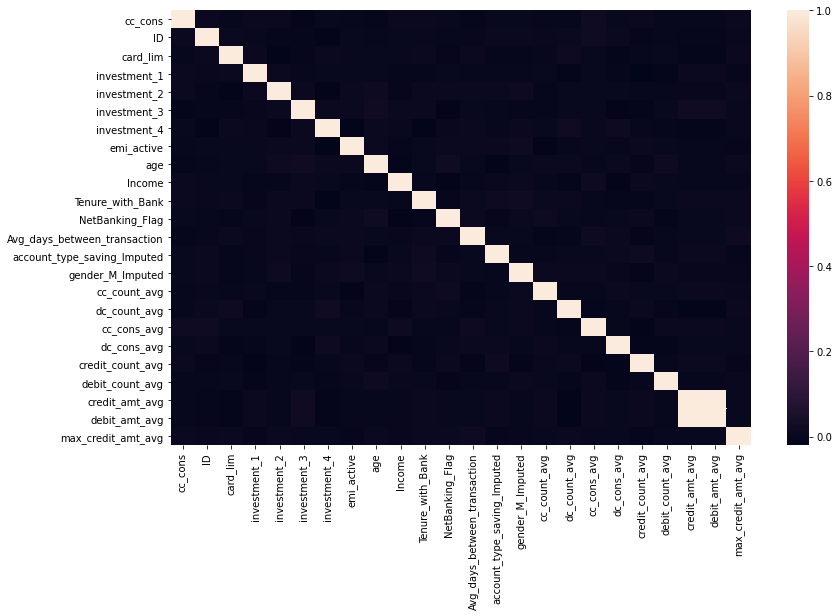

In [514]:
plt.figure(figsize = (13, 8))
sns.heatmap(cust_data.corr())


In [515]:
cust_data.corr().to_excel('cust_data.xlsx')

In [516]:
cust_data['prediction']=cust_data.cc_cons.mean()

<ipython-input-516-c26a804aa3ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data['prediction']=cust_data.cc_cons.mean()


In [517]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error


In [518]:
np.sqrt(mean_absolute_percentage_error(cust_data.cc_cons,cust_data['prediction']))

128687821.66522796

In [519]:
cust_data_sub=cust_data.iloc[0:2500]
cust_data_sub

,cc_cons,ID,card_lim,investment_1,investment_2,investment_3,investment_4,emi_active,age,Income,...,cc_count_avg,dc_count_avg,cc_cons_avg,dc_cons_avg,credit_count_avg,debit_count_avg,credit_amt_avg,debit_amt_avg,max_credit_amt_avg,prediction
0,20014.0,12554,430000,593.20,1244.14,787.0,6885.0,1674.09,35,2.0,...,12.666667,36.333333,17157.466667,13824.666667,3.333333,43.000000,76576.710000,76576.710000,33565.000000,55157.729867
1,10173.0,17645,127500,213557.15,172678.56,90525.0,1500.0,13043.34,35,3.0,...,7.000000,18.333333,14610.206667,712.666667,19.666667,58.666667,78687.123333,78687.123333,42641.333333,55157.729867
2,16095.0,7604,199999,165907.57,470000.00,25524.0,3735.0,25375.27,55,2.0,...,59.000000,28.333333,10533.206667,3941.703333,6.000000,51.666667,77047.000000,77047.000000,25418.000000,55157.729867
3,7707.0,1590,155000,81872.65,223379.40,48500.0,-4679.0,3544.33,29,2.0,...,34.666667,4.000000,20206.793333,8008.146667,24.666667,54.666667,122689.280000,122689.280000,36125.333333,55157.729867
4,96408.0,16556,297000,568.80,385000.00,183999.0,6916.0,12780.44,34,2.0,...,65.333333,46.000000,4642.133333,5224.740000,22.666667,42.666667,56441.010000,56441.010000,25623.333333,55157.729867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,312313.0,10291,352000,4500.00,399.09,24619.0,-4324.0,938.54,27,2.0,...,7.333333,17.666667,9776.150000,1455.670000,4.666667,46.666667,58632.863333,58632.863333,63825.000000,55157.729867
2496,37960.0,12223,157000,1207.50,12257.00,597.0,0.0,6603.90,66,2.0,...,17.333333,5.000000,3982.456667,3823.160000,15.666667,45.000000,38295.666667,38295.666667,43591.083333,55157.729867
2497,12794.0,18237,202500,48422.70,24703.00,2214.0,5340.0,5574.32,60,1.0,...,8.000000,16.666667,6019.833333,1382.100000,11.000000,23.000000,29645.643333,29645.643333,11138.333333,55157.729867
2498,634.0,4656,378000,1359.30,16000.00,30000.0,6916.0,1141.16,33,3.0,...,63.666667,30.000000,19256.853333,1073.006667,9.333333,45.666667,80091.333333,80091.333333,44795.666667,55157.729867


### Data splitting for training and Testing

In [520]:
feature=cust_data_sub.columns.difference(['cc_cons'])

In [521]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(cust_data_sub[feature],cust_data_sub['cc_cons'],test_size=0.3,random_state=123)

### Build a model

In [522]:
from sklearn.tree import DecisionTreeRegressor

In [523]:
treereg=DecisionTreeRegressor(random_state=123).fit(x_train,y_train)
y_predicted=treereg.predict(x_train)
y_test_pred=treereg.predict(x_test)

In [524]:
np.sqrt(mean_squared_error(y_train,y_predicted))

0.0

In [525]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

149225.5655122495

### Tunning a regression Tree

In [526]:
from sklearn.model_selection import GridSearchCV

In [527]:
params={'max_depth':range(1,3),
           'min_samples_leaf': range(5,7 ),    # 9
                     'min_samples_split': range(2, 12, 1)}   # 10}
GS_CV=GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),
                  param_grid=params,
                  cv=10,
                  n_jobs=-1,
                  verbose=10,
                  scoring='neg_mean_squared_error').fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [528]:
GS_CV.best_estimator_

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=123)

In [529]:
GS_CV.best_params_


{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [530]:
np.sqrt(-GS_CV.best_score_)

99236.47481832388

### create final model with best parameter

In [531]:
treereg=GS_CV.best_estimator_.fit(x_train, y_train)
y_pred_DT=treereg.predict(x_train)
y_test_pred_DT=treereg.predict(x_test)

In [532]:
y_pred_DT

array([47130.18315018, 60770.07514451, 60770.07514451, ...,
       47130.18315018, 60770.07514451, 47130.18315018])

In [533]:
print('train:',np.sqrt(mean_squared_error(y_train,y_pred_DT)))
print('test:',np.sqrt(mean_squared_error(y_test, y_test_pred_DT)))


train: 97647.80140864599
test: 99162.22702707238


In [534]:
print('train:',np.sqrt(mean_absolute_percentage_error(y_train,y_pred_DT)))
print('test:',np.sqrt(mean_absolute_percentage_error(y_test, y_test_pred_DT)))


train: 4.401940848906252
test: 3.690954574389652


In [535]:
treereg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25497164, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.48343322, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.26159514, 0.        ])

### Bagging Decision Tree

In [536]:
from sklearn.ensemble import BaggingRegressor

In [537]:
paragrid={'n_estimators':[520,540,560]}

In [538]:
BDT=GridSearchCV(estimator=BaggingRegressor(oob_score=True,max_samples=0.8,random_state=123),
                param_grid=paragrid,
                cv=10,
                n_jobs=-1,
                verbose=5,
                scoring='neg_mean_squared_error').fit(x_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [539]:
BDT.best_estimator_

BaggingRegressor(max_samples=0.8, n_estimators=540, oob_score=True,
                 random_state=123)

In [540]:
np.sqrt(-BDT.best_score_)

101795.90391422855

In [541]:
BDT=BDT.best_estimator_.fit(x_train,y_train)
y_pred_BDT=BDT.predict(x_train)
y_test_pred_BDT=BDT.predict(x_test)

In [542]:
print('train:',np.sqrt(mean_squared_error(y_train,y_pred_BDT)))
print('test:',np.sqrt(mean_squared_error(y_test,y_test_pred_BDT)))


train: 45611.810550071255
test: 102668.18857335746


In [543]:
print('train:',np.sqrt(mean_absolute_percentage_error(y_train,y_pred_BDT)))
print('test:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred_BDT)))


train: 3.144081701420798
test: 4.037382372940905


### Random Forest

In [596]:
from sklearn.ensemble import RandomForestRegressor

In [597]:
pargrid_rf = { 'n_estimators': [300,340, 380],
                  'max_features': [13,14,15,16] }

gscv_rf = GridSearchCV(estimator = RandomForestRegressor(min_samples_split = 2,max_depth=2,min_samples_leaf=2, random_state = 123 ), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = 10, 
                        scoring = 'neg_mean_squared_error',
                        n_jobs = -1 ).fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [598]:
gscv_rf.best_estimator_

RandomForestRegressor(max_depth=2, max_features=14, min_samples_leaf=2,
                      n_estimators=340, random_state=123)

In [547]:
np.sqrt(-gscv_rf.best_score_)

98877.45694087258

In [548]:
gscv_rf=gscv_rf.best_estimator_.fit(x_train,y_train)
y_pred_gscv_rf=gscv_rf.predict(x_train)
y_test_pred_gscv_rf=gscv_rf.predict(x_test)

In [549]:
print('train:',np.sqrt(mean_squared_error(y_train,y_pred_gscv_rf)))
print('test:',np.sqrt(mean_squared_error(y_test,y_test_pred_gscv_rf)))

train: 97133.83494215405
test: 99008.50027660053


In [550]:
print('train:',np.sqrt(mean_absolute_percentage_error(y_train,gscv_rf.predict(x_train))))
print('test:',np.sqrt(mean_absolute_percentage_error(y_test,gscv_rf.predict(x_test))))

train: 4.3599397144027
test: 3.770451467319447


In [551]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature': feature, 'importance': gscv_rf.feature_importances_})

,feature,importance
0,Avg_days_between_transaction,0.006898
1,ID,0.051276
2,Income,0.003518
3,NetBanking_Flag,0.000000
4,Tenure_with_Bank,0.002958
5,account_type_saving_Imputed,0.000693
6,age,0.046209
7,card_lim,0.018577
8,cc_cons_avg,0.054958
9,cc_count_avg,0.007768


### Adaboost

In [552]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [553]:
pargrid_ada = {'n_estimators': [420,460,500],
               'learning_rate':[10 ** x for x in range(-3, 2)]
               }

In [554]:
gscv_ada = GridSearchCV(estimator = AdaBoostRegressor(random_state=123), 
                        param_grid = pargrid_ada, 
                        cv = 5,
                        verbose = 10, 
                        scoring = 'neg_mean_squared_error',
                        n_jobs = -1).fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [555]:
gscv_ada.best_params_

{'learning_rate': 0.001, 'n_estimators': 420}

In [556]:
np.sqrt(-gscv_ada.best_score_)

98815.36700836892

In [557]:
gscv_ada.best_estimator_

AdaBoostRegressor(learning_rate=0.001, n_estimators=420, random_state=123)

In [558]:
gscv_ada=gscv_ada.best_estimator_.fit(x_train,y_train)
y_pred_gscv_ada=gscv_ada.predict(x_train)
y_test_pred_gscv_ada=gscv_ada.predict(x_test)

In [559]:
print('train:',np.sqrt(mean_squared_error(y_train,y_pred_gscv_rf)))
print('test:',np.sqrt(mean_squared_error(y_test,y_test_pred_gscv_rf)))

train: 97133.83494215405
test: 99008.50027660053


In [560]:
print('train:',np.sqrt(mean_absolute_percentage_error(y_train,y_pred_gscv_rf)))
print('test:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred_gscv_rf)))

train: 4.3599397144027
test: 3.770451467319447


In [561]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature': feature, 'importance': gscv_ada.feature_importances_})

,feature,importance
0,Avg_days_between_transaction,0.014969
1,ID,0.062339
2,Income,0.002737
3,NetBanking_Flag,0.000350
4,Tenure_with_Bank,0.009486
5,account_type_saving_Imputed,0.000002
6,age,0.075417
7,card_lim,0.022398
8,cc_cons_avg,0.068325
9,cc_count_avg,0.011123


### Gradient Boost

In [562]:
pargrid_gbm = {'n_estimators': [5,10,20],
                    'learning_rate': [10 ** x for x in range(-4, 1)],
                        'max_features': [15,16,17]}

In [563]:
gscv_gbm = GridSearchCV(estimator = GradientBoostingRegressor(random_state=123), 
                            param_grid = pargrid_gbm, 
                            cv = 5,
                            verbose = 10,
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1).fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [564]:
gscv_gbm.best_estimator_

GradientBoostingRegressor(max_features=15, n_estimators=10, random_state=123)

In [565]:
np.sqrt(-gscv_gbm.best_score_)

98457.80453290055

In [566]:
gscv_gbm=gscv_gbm.best_estimator_.fit(x_train,y_train)
y_pred_gscv_gbm=gscv_gbm.predict(x_train)
y_test_pred_gscv_gbm=gscv_gbm.predict(x_test)

In [567]:
print('train:',np.sqrt(mean_squared_error(y_train,y_pred_gscv_gbm)))
print('test:',np.sqrt(mean_squared_error(y_test,y_test_pred_gscv_gbm)))

train: 96249.36833584306
test: 99479.11558031828


In [568]:
print('train:',np.sqrt(mean_absolute_percentage_error(y_train,y_pred_gscv_gbm)))
print('test:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred_gscv_gbm)))

train: 4.349112437387896
test: 3.7427893828491388


In [569]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature': feature, 'importance': gscv_gbm.feature_importances_})

,feature,importance
0,Avg_days_between_transaction,0.000000
1,ID,0.049834
2,Income,0.000000
3,NetBanking_Flag,0.000000
4,Tenure_with_Bank,0.000000
5,account_type_saving_Imputed,0.000000
6,age,0.092755
7,card_lim,0.024353
8,cc_cons_avg,0.046261
9,cc_count_avg,0.014054


### Using Linear Regression

In [570]:
cust_data['log_cc_cons']=np.log(cust_data.loc[:,'cc_cons'])

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-570-82d857e857af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data['log_cc_cons']=np.log(cust_data.loc[:,'cc_cons'])


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

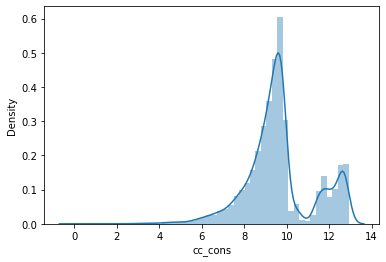

In [571]:
sns.distplot(np.log1p(cust_data.loc[:,"cc_cons"]), kde=True)

In [572]:
from sklearn.feature_selection import f_regression

In [573]:
features_selection = cust_data.columns.difference(['prediction',"log_cc_cons",'ID',"cc_cons"])

In [574]:
# seperate the X and y columns
features_1 = cust_data[ features_selection ]
target = cust_data.log_cc_cons

In [575]:
target=target.replace([np.inf,-np.inf],1)

In [576]:
# do the f_regression
F_values, p_values  = f_regression( features_1, target )

# display the data in the tabular form for each X variable
f_reg_output = pd.DataFrame([features_1.columns, F_values, p_values]).T

# add the column names
f_reg_output.columns = ['Features', 'FScore', 'Pvalue']

# Filter the significant variables at p : 0.1
feature_columns =list( f_reg_output.loc[ f_reg_output.Pvalue <= 0.1, 'Features' ] )
feature_columns

['cc_cons_avg', 'investment_2']

In [577]:
target.isnull().sum()

0

In [578]:
np.isinf(features_1).sum()

Avg_days_between_transaction    0
Income                          0
NetBanking_Flag                 0
Tenure_with_Bank                0
account_type_saving_Imputed     0
age                             0
card_lim                        0
cc_cons_avg                     0
cc_count_avg                    0
credit_amt_avg                  0
credit_count_avg                0
dc_cons_avg                     0
dc_count_avg                    0
debit_amt_avg                   0
debit_count_avg                 0
emi_active                      0
gender_M_Imputed                0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
max_credit_amt_avg              0
dtype: int64

In [579]:
f_reg_output

,Features,FScore,Pvalue
0,Avg_days_between_transaction,2.01428,0.155846
1,Income,0.003248,0.954551
2,NetBanking_Flag,0.025808,0.872371
3,Tenure_with_Bank,0.417024,0.518435
4,account_type_saving_Imputed,0.460568,0.497369
5,age,1.261393,0.261406
6,card_lim,0.596817,0.439807
7,cc_cons_avg,9.630251,0.001918
8,cc_count_avg,0.23835,0.625408
9,credit_amt_avg,0.004379,0.947243


In [580]:
model_param ='''log_cc_cons ~ cc_cons_avg + investment_2'''

In [581]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [582]:
# separate the Y and X variables; it will add new variable named Intercept
y, X = dmatrices( model_param,cust_data, return_type = 'dataframe' )

In [583]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor( X.values, i ) for i in range(X.shape[1]) ]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,2.6
1,cc_cons_avg,1.0
2,investment_2,1.0


In [584]:
cust_data.log_cc_cons=cust_data.replace([np.inf,-np.inf],1)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [585]:
# get training and testing datasets
train_X, test_X, train_y, test_y = train_test_split( cust_data[feature_columns], 
                                                        cust_data['log_cc_cons'], 
                                                        test_size = 0.3,
                                                        random_state = 123)

In [586]:
from sklearn.linear_model import LinearRegression

In [587]:
lr = LinearRegression().fit(train_X,train_y)

In [588]:
lr.predict(train_X)

array([53228.8421185 , 53613.53486048, 53355.62800407, ...,
       55276.37900805, 52822.03250676, 56781.81172953])

In [589]:

print(mean_squared_error(train_y,lr.predict(train_X)))
print(mean_squared_error(test_y,lr.predict(test_X)))

9487814693.710735
9651991407.813051


In [590]:
print(mean_absolute_percentage_error(train_y,lr.predict(train_X)))
print(mean_absolute_percentage_error(test_y,lr.predict(test_X)))

2.2802742513099108e+16
25.22948646676198


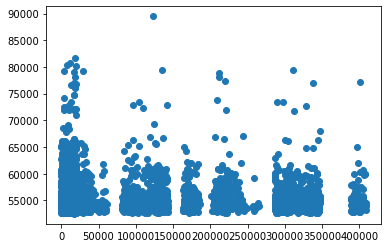

In [591]:
plt.scatter(train_y,lr.predict(train_X))

### Among all, random forest model is working Best

In [625]:
featur=cust_data.columns.difference(["cc_cons","prediction","log_cc_cons"])

In [626]:
train_x,test_x,train_y,test_y=train_test_split( cust_data[featur], 
                                                        cust_data['cc_cons'], 
                                                        test_size = 0.3,
                                                        random_state = 123)

In [627]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons                       15000 non-null  float64
 1   ID                            15000 non-null  int64  
 2   card_lim                      15000 non-null  int64  
 3   investment_1                  15000 non-null  float64
 4   investment_2                  15000 non-null  float64
 5   investment_3                  15000 non-null  float64
 6   investment_4                  15000 non-null  float64
 7   emi_active                    15000 non-null  float64
 8   age                           15000 non-null  int64  
 9   Income                        15000 non-null  float64
 10  Tenure_with_Bank              15000 non-null  int64  
 11  NetBanking_Flag               15000 non-null  int64  
 12  Avg_days_between_transaction  15000 non-null  float64
 13  a

In [628]:
rand_for=gscv_rf.best_estimator_.fit(train_x,train_y)
aa=rand_for.predict(train_x)
aa_test=rand_for.predict(test_x)


In [629]:
print(np.sqrt(mean_squared_error(train_y,aa)))
print(np.sqrt(mean_squared_error(test_y,aa_test)))

97149.3143574147
98226.1880173721


In [630]:
print(np.sqrt(mean_absolute_percentage_error(train_y,aa)))
print(np.sqrt(mean_absolute_percentage_error(test_y,aa_test)))

150397393.5826497
5.018013652507382


In [619]:
Y_TEST

,cc_cons,ID,card_lim,investment_1,investment_2,investment_3,investment_4,emi_active,age,Income,...,gender_M_Imputed,cc_count_avg,dc_count_avg,cc_cons_avg,dc_cons_avg,credit_count_avg,debit_count_avg,credit_amt_avg,debit_amt_avg,max_credit_amt_avg
15000,36265.203500,17591,125000,13.80,376600.50,1633.0,-5715.49023,1170.49,37,2.0,...,1,6.000000,36.333333,6027.533333,5815.166667,21.000000,16.000000,39122.333333,39122.333333,20060.306667
15001,35183.398470,13541,59000,101891.25,470000.00,891.0,35346.00000,16447.45,33,2.0,...,1,5.666667,39.666667,14007.543333,1686.640000,18.000000,40.333333,56275.666667,56275.666667,10852.000000
15002,34846.484297,13431,49999,53374.97,674291.83,54101.0,2557.00000,2622.28,53,1.0,...,1,14.000000,17.666667,3132.430000,3696.073333,17.666667,28.333333,36859.346667,36859.346667,21521.000000
15003,39446.651869,8687,520000,9118.35,470000.00,5905.0,5464.00000,340.79,33,2.0,...,1,57.000000,5.666667,13709.920000,12859.000000,8.333333,17.000000,66917.043333,66917.043333,135328.666667
15004,46044.455375,14727,152000,12850544.36,101.24,130000.0,1332.00000,2812.20,62,1.0,...,1,19.666667,10.333333,3266.960000,3783.923333,25.666667,40.333333,27519.666667,27519.666667,28258.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,39355.711588,12512,595000,84446.00,961916.90,492.0,553.00000,7870.88,35,2.0,...,1,10.333333,9.666667,17464.370000,4091.193333,23.333333,22.333333,69526.080000,69526.080000,39602.000000
19996,35514.864450,14224,13000,1892440.00,295150.90,10271.0,20324.00000,3668.30,53,2.0,...,1,47.666667,25.666667,9749.816667,3228.033333,31.000000,26.000000,57862.000000,57862.000000,20290.666667
19997,35941.020771,18740,124000,115.45,200015.58,30000.0,6885.00000,5450.34,62,3.0,...,1,30.000000,6.666667,4909.131667,5352.680000,8.666667,52.666667,76552.286667,76552.286667,17389.333333
19998,39631.797566,18134,371000,48796.45,1631.11,925.0,10455.00000,59.29,34,2.0,...,1,24.000000,37.333333,13399.753333,14353.666667,44.333333,38.666667,34649.000000,34649.000000,33406.333333


### Predicted Data

In [631]:
feat = Y_TEST.columns.difference(["cc_cons"])

In [632]:
Y_TEST['cc_cons']=rand_for.predict(Y_TEST[feat])

<ipython-input-632-b5dac00e0fe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TEST['cc_cons']=rand_for.predict(Y_TEST[feat])


In [633]:
Y_TEST['cc_cons']

15000    53597.674787
15001    58376.186677
15002    53368.482633
15003    52810.151676
15004    53683.941679
             ...     
19995    56031.108331
19996    54557.003156
19997    53592.888000
19998    55610.302461
19999    54501.637330
Name: cc_cons, Length: 5000, dtype: float64